# **Wagner-Nelson Method**

In [1]:
from IPython.display import display, Math
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import plotly.io as pio
pio.renderers.default = 'png'

import Module_

## **Exercise 1**  
A 500-mg modified-release oral formulation was tested against a solution (500 mg) of a drug in 18 healthy volunteers. A previous study demonstrated that the drug is rapidly and completely absorbed when given in solution. Subjects took a single 500-mg dose on a fasted stomach on separate occasions.  

Plasma drug concentration-time data following oral ingestion of the modified-release product are listed in Table G-2 for one subject. Following administration of the oral solution, the AUC and half-life of the drug in the subject were **86.6 mg·hr/L** and **5 hr**, respectively.  

**(a)** Using the Wagner-Nelson method, complete Table G-2 by calculating **A∞/V** with time, following administration of the modified-release dosage form. In your calculation, use the half-life obtained in this subject following administration of the solution.  

**(b)** What assumption have you made in applying the Wagner-Nelson method?  

**(c)** What is the bioavailability of the drug in the subject from the modified-release product relative to that from the oral solution?  

**(d)** By an appropriate graphical analysis of the absorption data, ascertain whether absorption of drug from the modified-release product in vivo is first-order, and if so, the half-life of the absorption process.  

_Table G-2 | Plasma Concentration and Area under the Curve (AUC) Data following a 500-mg Modified-Release Product_  

| Time (hr) | Plasma Concentration (mg/L) | AUC (mg·hr/L) | A(ab)/V (mg/L) |
|-----------|-----------------------------|----------------|-------------|
| 0         | 0.00                        | 0.00           | -           |
| 0.5       | 0.76                        | 0.19           | -           |
| 1         | 1.42                        | 0.73           | -           |
| 2         | 2.48                        | 2.68           | -           |
| 3         | 3.24                        | 5.54           | -           |
| 4         | 3.75                        | 9.63           | -           |
| 6         | 4.27                        | 17.05          | -           |
| 8         | 4.10                        | 25.63          | -           |
| 10        | 4.09                        | 34.03          | -           |
| 12        | 3.72                        | 41.84          | -           |
| 18        | 2.14                        | 58.42          | -           |
| 24        | 1.45                        | 72.11          | -           |
| 36        | 0.83                        | 83.39          | -           |
| 48        | 0.41                        | 86.63          | -           |

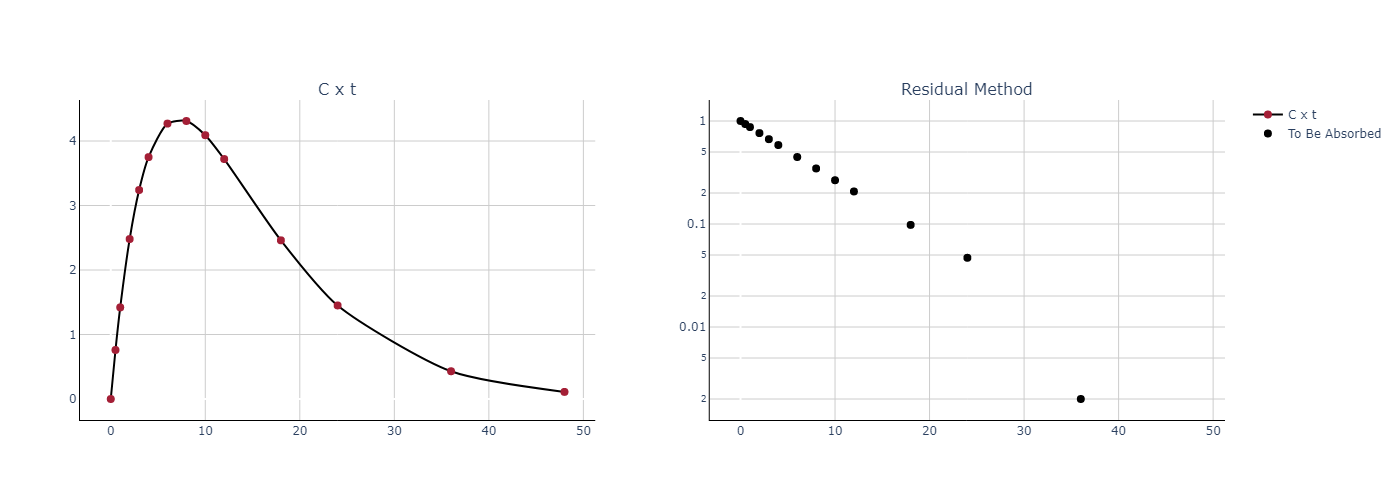

,t,C,AUC,A(ab)/V,Bioavailable Drug Absorbed,Bioavailable Drug Remained to be Absorbed
0,0.0,0.00,0.00,0.00,0.000,1.000
1,0.5,0.76,0.19,0.79,0.066,0.934
2,1.0,1.42,0.73,1.52,0.127,0.873
3,2.0,2.48,2.68,2.85,0.237,0.763
4,3.0,3.24,5.54,4.01,0.334,0.666
5,4.0,3.75,9.04,5.00,0.416,0.584
6,6.0,4.27,17.06,6.64,0.553,0.447
7,8.0,4.31,25.64,7.86,0.654,0.346
8,10.0,4.09,34.04,8.81,0.734,0.266
9,12.0,3.72,41.85,9.52,0.793,0.207


In [2]:
Dose = 500
AUC = 86.6
half_life = 5
C = pd.DataFrame({
    't': [0, 0.5, 1, 2, 3, 4, 6, 8, 10, 12, 18, 24, 36, 48],
    'C': [0.00, 0.76, 1.42, 2.48, 3.24, 3.75, 4.27, 4.31, 4.09, 3.72, 2.46, 1.45, 0.43, 0.11],
})

k = np.log(2)/half_life
C['AUC'] = 0.
for i in range(1, len(C)):
    C.loc[i, 'AUC'] = round(C.loc[i - 1, 'AUC'] + 0.5 * (C.loc[i, 'C'] + C.loc[i - 1, 'C']) * (C.loc[i, 't'] - C.loc[i - 1, 't']),2)
C['A(ab)/V'] = round(C['C'] + k*C['AUC'],2)
C['Bioavailable Drug Absorbed'] = round(C['A(ab)/V']/(k*C['AUC'][-1:].values),3)
C['Bioavailable Drug Remained to be Absorbed'] = round(1-C['Bioavailable Drug Absorbed'],3)

fig = plotly.subplots.make_subplots(cols=2, rows=1,
    subplot_titles=['C x t','Residual Method']
)

# Conventional Plot
fig.add_trace(trace=go.Scatter(
    x=C['t'], y=C['C'], mode='lines+markers', name='C x t',
    marker=dict(color='rgba(164,31,54,1)', size=8), line=dict(color='rgba(0,0,0,1)', shape='spline', smoothing=0.7)
), col=1, row=1)

# Semi Log Plot
fig.add_trace(trace=go.Scatter(
    x=C['t'], y=C['Bioavailable Drug Remained to be Absorbed'], mode='markers', name='To Be Absorbed',
    marker=dict(color='rgba(0,0,0,1)', size=8),
), col=2, row=1)

Module_.main_subplot_layout(fig, yaxis2_type="log").show()
display(C)

## **Exercise 2**  
In study problem 5, Chapter 10, Constant-Rate Input, plasma concentration–time data are provided during and following a **24-hr i.v. constant-rate infusion** and a **rectal delivery device** of droperidol.  

**(a)** Given a **half-life of 1.9 hr** estimated from the declining concentration after stopping the i.v. infusion, apply the **Wagner-Nelson method** to the plasma concentration–time data to calculate the absorption kinetics of droperidol following administration of the rectal device.  

**(b)** The device is intended to deliver the drug at a constant rate for **15 hr**. Do the absorption kinetics in vivo meet this expectation?